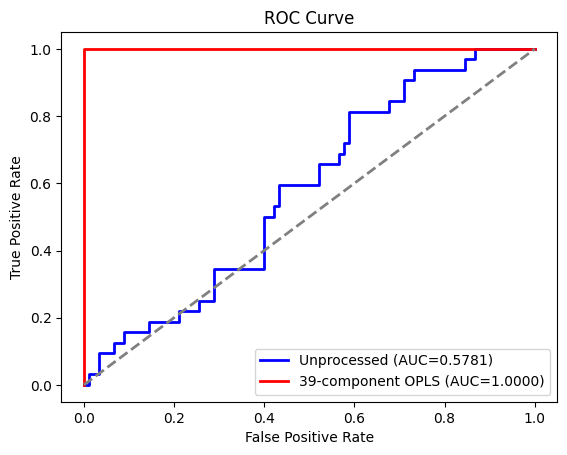

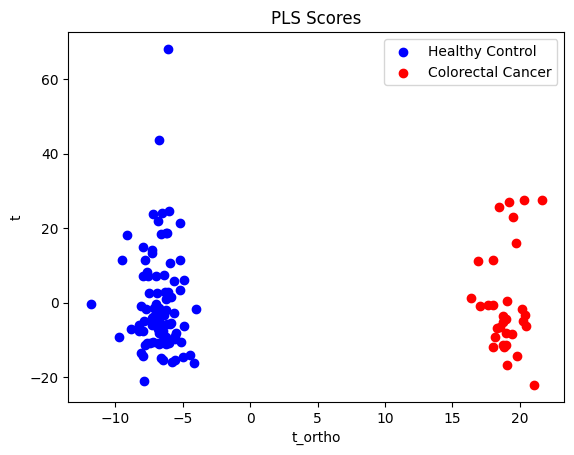

In [477]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from pyopls import OPLS
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.metrics import r2_score, accuracy_score


spectra = pd.read_csv('colorectal_cancer_nmr.csv', index_col=0)
spectra = spectra[spectra.classification.isin(['Colorectal Cancer', 'Healthy Control'])]
target = spectra.classification.apply(lambda x: 1 if x == 'Colorectal Cancer' else -1)
spectra = spectra.drop('classification', axis=1)

opls = OPLS(39)
Z = opls.fit_transform(spectra, target)

pls = PLSRegression(1)
y_pred = cross_val_predict(pls, spectra, target, cv=LeaveOneOut())
q_squared = r2_score(target, y_pred)  # -0.107
dq_squared = r2_score(target, np.clip(y_pred, -1, 1))  # -0.106
accuracy = accuracy_score(target, np.sign(y_pred))  # 0.705

processed_y_pred = cross_val_predict(pls, Z, target, cv=LeaveOneOut())
processed_q_squared = r2_score(target, processed_y_pred)  # 0.981
processed_dq_squared = r2_score(target, np.clip(processed_y_pred, -1, 1))  # 0.984
processed_accuracy = accuracy_score(target, np.sign(processed_y_pred))  # 1.0

r2_X = opls.score(spectra)  # 7.8e-12 (most variance is removed)

fpr, tpr, thresholds = roc_curve(target, y_pred)
roc_auc = roc_auc_score(target, y_pred)
proc_fpr, proc_tpr, proc_thresholds = roc_curve(target, processed_y_pred)
proc_roc_auc = roc_auc_score(target, processed_y_pred)

plt.figure(0)
plt.plot(fpr, tpr, lw=2, color='blue', label=f'Unprocessed (AUC={roc_auc:.4f})')
plt.plot(proc_fpr, proc_tpr, lw=2, color='red',
         label=f'39-component OPLS (AUC={proc_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

plt.figure(1)
pls.fit(Z, target)
df = pd.DataFrame(np.column_stack([pls.x_scores_, opls.T_ortho_[:, 0]]),
                  index=spectra.index, columns=['t', 't_ortho'])                           
pos_df = df[target==1]
neg_df = df[target==-1]
plt.scatter(neg_df['t'], neg_df['t_ortho'], c='blue', label='Healthy Control')
plt.scatter(pos_df['t'], pos_df['t_ortho'], c='red', label='Colorectal Cancer')
plt.title('PLS Scores')
plt.xlabel('t_ortho')
plt.ylabel('t')
plt.legend(loc='upper right')
plt.show()

In [478]:
def print_pairplot(array, 
                   LIST_DIM_PAIR_PLOT=[0,1,2], 
                   indice_color=None,
                   marker = ',',
                   s = 1,
                   cmap = 'jet', 
                   indice = None
                   ):
    nb_dim = len(LIST_DIM_PAIR_PLOT)
    fig, axes = plt.subplots(nb_dim, nb_dim, 
                            figsize=(5*nb_dim, 5*nb_dim))
    ax_list = axes.ravel()

    if indice_color is None:
        indice_color = np.zeros(len(array))

    for i, a in enumerate(LIST_DIM_PAIR_PLOT):
        for j in range(i+1):
            o = LIST_DIM_PAIR_PLOT[j]
            plt.subplot(nb_dim, nb_dim, nb_dim*i+j+1)
            plt.scatter(array[:,a], array[:,o], s=s, marker = marker, c= indice_color, cmap = cmap)
            plt.xlabel(f"dim {a}")
            plt.ylabel(f"dim {o}")

    if indice is not None : 
        plt.colorbar(ax=axes,  shrink = 0.6)
        name_indice = indice.__name__
        plt.suptitle(f"color according to {name_indice}", 
                    verticalalignment = 'bottom', 
                    size = 'xx-large')
        

    for i in range(nb_dim):
        for j in range(i+1,nb_dim):
            plt.subplot(nb_dim, nb_dim, nb_dim*i+j+1)
            plt.axis('off')



In [479]:
OPLS?

Init signature: OPLS(n_components=5, scale=True)
Docstring:     
Orthogonal Projection to Latent Structures (O-PLS)

This class implements the O-PLS algorithm for one (and only one) response as described by [Trygg 2002].
This is equivalent to the implementation of the libPLS MATLAB library (http://libpls.net/)

Parameters
----------
n_components: int, number of orthogonal components to filter. (default 5).

scale: boolean, scale data? (default True)

Attributes
----------
W_ortho_ : weights orthogonal to y

P_ortho_ : loadings orthogonal to y

T_ortho_ : scores orthogonal to y

x_mean_ : mean of the X provided to fit()
y_mean_ : mean of the Y provided to fit()
x_std_ : std deviation of the X provided to fit()
y_std_ : std deviation of the Y provided to fit()

References
----------
Johan Trygg and Svante Wold. Orthogonal projections to latent structures (O-PLS).
J. Chemometrics 2002; 16: 119-128. DOI: 10.1002/cem.695
File:           c:\users\salvador\appdata\local\packages\pythonsoftwar

In [558]:
# genère nuage de point avec un atribut bruité

N = 1000
dim = 3
mu = np.zeros(dim)
cov = np.eye(dim)

def f(x):
    return x[0]**2 - x[1]**3  + x[2]

def f2(x):
    return x[0]+x[1]


def f3(x):
    return 4*x[0]+2*x[1]


nuage_x = .5*np.random.multivariate_normal(mu, cov, size = N)
attrib_pts = np.array([f2(x) for x in nuage_x]) #+ .2* np.random.normal(size=N)



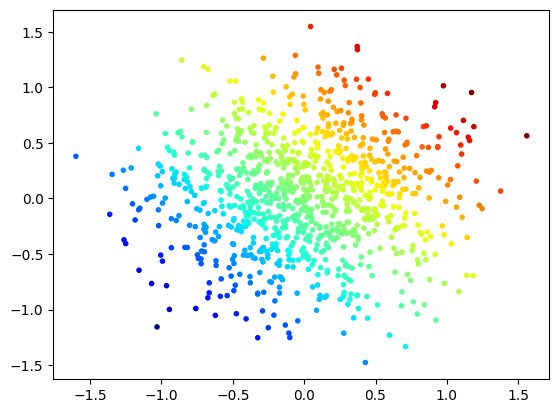

In [559]:

plt.scatter(nuage_x[:,0], nuage_x[:,1], marker='.',  c= attrib_pts, cmap = 'jet')


In [583]:
np_comp_pls = 2

opls = OPLS(n_components=np_comp_pls, )

opls.fit(nuage_x, attrib_pts)
new_x = opls.transform(nuage_x)

In [584]:
opls.T_ortho_.shape

(1000, 3)

In [585]:
opls.P_ortho_.shape

(3, 3)

In [586]:
opls.W_ortho_.shape

(3, 3)

In [587]:
X = nuage_x

machin = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ opls.T_ortho_

print(machin.shape)
print(opls.W_ortho_.shape)

(3, 3)
(3, 3)


In [588]:
test1 = np.array( [x @ opls.W_ortho_ @ opls.P_ortho_.transpose() for x in nuage_x ])
test2 = np.array( [x @ machin for x in nuage_x ])

test3 = np.array( [x @ opls.W_ortho_ @ opls.P_ortho_.transpose() for x in new_x ])
test4 = np.array( [x @ machin for x in new_x ])

# test5 = np.array( [ rot3 @ x  for x in nuage_x ])

print(test1.shape)

(1000, 3)


In [589]:
# a=0
# o=1
# array = test3

# for i,array in enumerate([test1, test2, test3, test4]):
#     plt.scatter(array[:,a], array[:,o], marker='.',  c= attrib_pts, cmap = 'jet')
#     plt.title(f'test{i+1}')
#     plt.show()

In [590]:
nuage_x.std(axis=0).shape

(3,)

In [591]:
x_centre = nuage_x - nuage_x.mean(axis=0)
x_red = x_centre / nuage_x.std()

t = np.dot(x_red, opls.W_ortho_[:, 0]).reshape(-1, 1)

x_red -= np.dot(t, opls.P_ortho_[:, 0].T.reshape(1, -1))



In [592]:
print(t.shape)
print(x_red.shape)

(1000, 1)
(1000, 3)


In [593]:
tab = np.zeros((1000,2))
print(tab.shape)
tab[:, 0] = t[:,0]
tab[:, 1] = x_red[:,0]

(1000, 2)


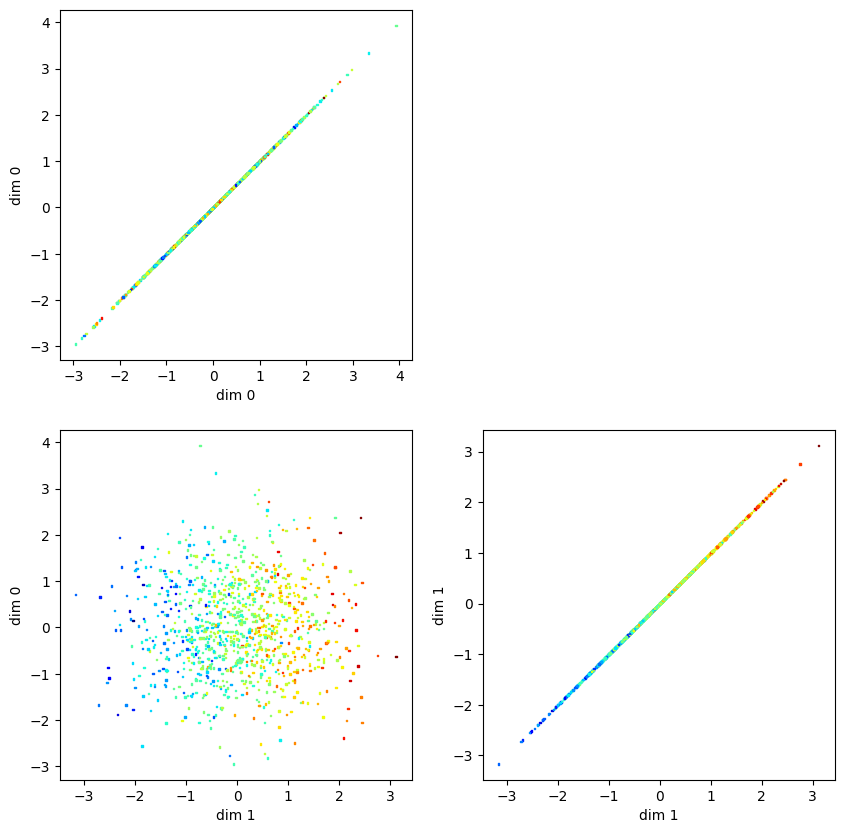

In [594]:
LIST_DIM_PAIR_PLOT = [0, 1]

print_pairplot(tab, LIST_DIM_PAIR_PLOT = LIST_DIM_PAIR_PLOT, 
                indice_color=attrib_pts)

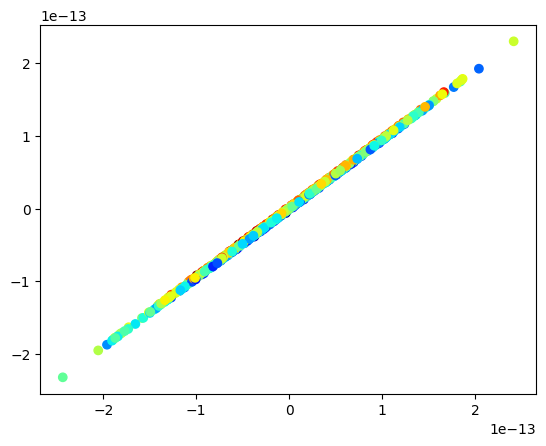

In [595]:
plt.scatter(new_x[:,0], new_x[:,1], c=attrib_pts, cmap='jet')

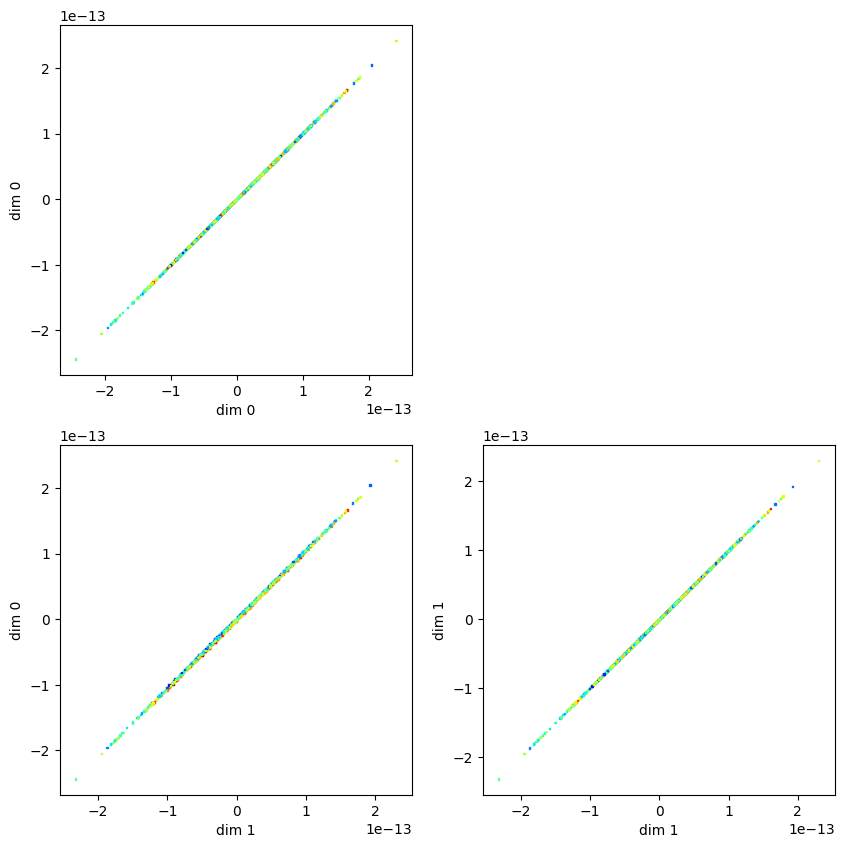

In [596]:
LIST_DIM_PAIR_PLOT = [0, 1]

print_pairplot(new_x, LIST_DIM_PAIR_PLOT = LIST_DIM_PAIR_PLOT, 
                indice_color=attrib_pts)

In [597]:
pls_post = PLSRegression(3)
pls_post.fit(new_x, attrib_pts)

PLSRegression(n_components=3)

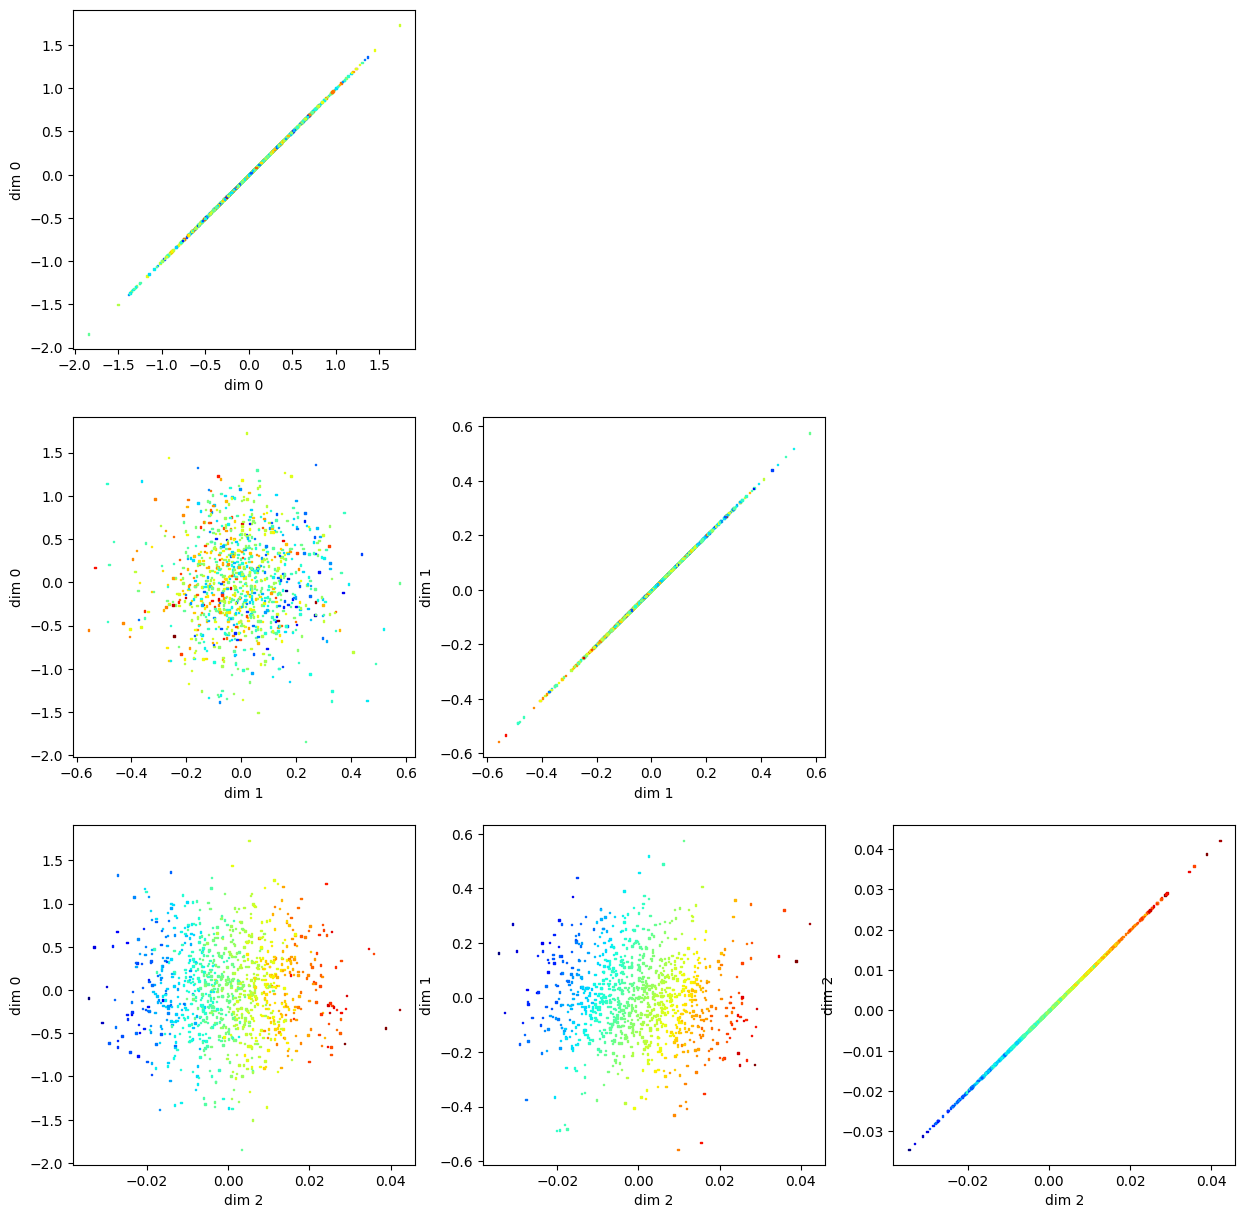

In [599]:
LIST_DIM_PAIR_PLOT = [0,1, 2]

print_pairplot(pls_post.x_scores_, LIST_DIM_PAIR_PLOT = LIST_DIM_PAIR_PLOT, 
                indice_color=attrib_pts)

générer le nuage de points avec un attribut

In [947]:
# genère nuage de point avec un atribut bruité

N = 1000
dim = 2
mu = np.zeros(dim)
cov = np.eye(dim)

nuage_x = .5*np.random.multivariate_normal(mu, cov, size = N)

In [948]:
def f(x):
    return x[0]**2 - x[1]**3  #+ x[2]

def f2(x):
    return x[0]+x[1]


def f3(x):
    return 4*x[0]+2*x[1]


attrib_pts = np.array([f2(x) for x in nuage_x]) #+ .2* np.random.normal(size=N)

In [949]:
# LIST_DIM_PAIR_PLOT = [0,1, 2]

# print_pairplot(nuage_x, LIST_DIM_PAIR_PLOT = LIST_DIM_PAIR_PLOT, 
#                 indice_color=attrib_pts)

une PLS classique pour comparer

In [950]:
n_comp_pls = 2
pls = PLSRegression(n_comp_pls)
pls.fit(nuage_x, attrib_pts)

PLSRegression()

In [951]:
# LIST_DIM_PAIR_PLOT = [0,1, ]

# print_pairplot(pls.x_scores_, LIST_DIM_PAIR_PLOT = LIST_DIM_PAIR_PLOT, 
#                 indice_color=attrib_pts)

In [960]:
PLSRegression?

Init signature:
PLSRegression(
    n_components=2,
    *,
    scale=True,
    max_iter=500,
    tol=1e-06,
    copy=True,
)
Docstring:     
PLS regression.

PLSRegression is also known as PLS2 or PLS1, depending on the number of
targets.

Read more in the :ref:`User Guide <cross_decomposition>`.

.. versionadded:: 0.8

Parameters
----------
n_components : int, default=2
    Number of components to keep. Should be in `[1, min(n_samples,
    n_features, n_targets)]`.

scale : bool, default=True
    Whether to scale `X` and `Y`.

max_iter : int, default=500
    The maximum number of iterations of the power method when
    `algorithm='nipals'`. Ignored otherwise.

tol : float, default=1e-06
    The tolerance used as convergence criteria in the power method: the
    algorithm stops whenever the squared norm of `u_i - u_{i-1}` is less
    than `tol`, where `u` corresponds to the left singular vector.

copy : bool, default=True
    Whether to copy `X` and `Y` in :term:`fit` before applying ce

OPLS fitting

In [952]:
np_comp_opls = 2

opls = OPLS(n_components=np_comp_opls, )

opls.fit(nuage_x, attrib_pts)
new_x = opls.transform(nuage_x)

In [953]:
# LIST_DIM_PAIR_PLOT = [0, 1, 2]

# print_pairplot(new_x , LIST_DIM_PAIR_PLOT = LIST_DIM_PAIR_PLOT, 
#                 indice_color=attrib_pts)

In [954]:
# LIST_DIM_PAIR_PLOT = [0, 1]

# print_pairplot(new_x @ pls.x_weights_ , LIST_DIM_PAIR_PLOT = LIST_DIM_PAIR_PLOT, 
#                 indice_color=attrib_pts)

corelation coeff

In [955]:
corr = np.zeros(dim)
for k in range(dim):
    corr[k] = np.corrcoef(nuage_x[:,k], attrib_pts)[0,1]

print(corr)
corr.mean()

[0.72346559 0.71144287]


0.7174542289164051

In [956]:
corr_pls = np.zeros(n_comp_pls)
for k in range(n_comp_pls):
    corr_pls[k] = np.corrcoef(pls.x_scores_[:,k], attrib_pts)[0,1]

print(corr_pls)
corr_pls.mean()

[ 9.99999877e-01 -4.95495886e-04]


0.4997521906777904

In [959]:
corr_opls = np.zeros(np_comp_opls)
for k in range(np_comp_opls):
    corr_opls[k] = np.corrcoef((new_x @ pls.x_weights_ )[:,k], attrib_pts)[0,1]

print(corr_opls)
corr_opls.mean()

[-0.00304553  0.48661261]


0.24178353862808338